#Data Preparation



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
user = pd.read_csv("/content/drive/MyDrive/bds/step1.csv", sep=',', lineterminator='\n')

user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",NaN,False,1698,4,53,2016-10-15 21:32:11,4,False,False,13097,NaN,False,False,False
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,https://t.co/DJ4TYZgm7Q,False,823,852,5,2016-11-09 05:01:30,516,False,False,251,NaN,False,False,False
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",https://t.co/jIrurMaqEX,False,193,805,2,2017-06-17 05:34:27,4105,True,False,1201,NaN,False,False,False
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,NaN,False,569,659,2,2016-07-21 13:32:25,10086,True,False,1648,NaN,True,True,False
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",NaN,False,748235,118,1818,2012-01-15 16:32:35,152,True,True,4292,NaN,True,False,False


In [3]:
user["protected"] = user["protected"].astype(int)
user["geo_enabled"] = user["geo_enabled"].astype(int)
user["verified"] = user["verified"].astype(int)
user["profile_use_background_image"] = user["profile_use_background_image"].astype(int)
user["default_profile"] = user["default_profile"].astype(int)
user["default_profile_image"] = user["default_profile_image"].astype(int)
for i in user.index:
  if user["url"][i] is None:
    user["url"][i] = 0
  else:
    user["url"][i] = 1
user.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0


##add account age

In [4]:
type(user['created_at'][i])

str

In [5]:
import datetime;
  
# ct stores current time
today = datetime.datetime.now()
today = pd.to_datetime(today)
type(today)

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
for i in user.index:
  user['created_at'][i] = pd.to_datetime(user['created_at'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
type(user['created_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
account_age = []
for i in user.index:
  account_age.append( (today - user['created_at'][i]).days )

In [9]:
print(account_age)

[1676, 1652, 1432, 1763, 3411, 4332, 3175, 3076, 3381, 3449, 2524, 4493, 3633, 3849, 3194, 1718, 1717, 3399, 3515, 3645, 3014, 3743, 3544, 4780, 3661, 1277, 4162, 3358, 4108, 2756, 3521, 3217, 2121, 4454, 4304, 3773, 4466, 1735, 4488, 3783, 3012, 2559, 3316, 4454, 3620, 3658, 4342, 3764, 2349, 4082, 2336, 4068, 3048, 4086, 4390, 1230, 2750, 2315, 4585, 1049, 3870, 3577, 3299, 1953, 3522, 4670, 3274, 3222, 3611, 3145, 1893, 1857, 5431, 4498, 1432, 1823, 1596, 3257, 4324, 4358, 4152, 2507, 4393, 4421, 4450, 3383, 2024, 1440, 1430, 3676, 4305, 3727, 4670, 4110, 4488, 4345, 2946, 5424, 4422, 3391, 3156, 3595, 4065, 4110, 4120, 3156, 3719, 4051, 2839, 4316, 4119, 2458, 3226, 3234, 2868, 3764, 3185, 2826, 4689, 3217, 2132, 4481, 4182, 4211, 4303, 4418, 1395, 3698, 3738, 1940, 2666, 2523, 2811, 4356, 1473, 4478, 4475, 2830, 3182, 3822, 4540, 4425, 3111, 2250, 3512, 3825, 3183, 3398, 4388, 2808, 4198, 4408, 3073, 4380, 4410, 3478, 4447, 995, 4448, 4358, 3945, 4529, 3147, 3151, 3378, 3179, 4091

In [10]:
user['account_age'] = account_age
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1676
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1652
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1432
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1763
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3411


##add log_follower_growth_rate

In [11]:
log_follower_growth_rate = []
for i in user.index:
  log_follower_growth_rate.append( user['followers_count'][i] / user['account_age'][i])
print(log_follower_growth_rate)

[1.0131264916467781, 0.49818401937046003, 0.13477653631284917, 0.3227453204764606, 219.35942538844913, 66.81163434903047, 2246.5738582677163, 0.007802340702210663, 0.6143152913339249, 0.008698173383589447, 11.725435816164818, 57.66036056087247, 520.9898155794109, 65.5900233826968, 1.6321227301189731, 0.0, 0.0, 0.6684318917328627, 0.0017069701280227596, 10.058161865569273, 0.0013271400132714001, 2121.0149612610207, 4.486738148984198, 35.715062761506275, 0.1578803605572248, 4.549725920125294, 0.032196059586737144, 75.00029779630732, 1.9841772151898733, 0.260522496371553, 0.017892644135188866, 0.0006216972334473111, 0.1254125412541254, 24.848001796138302, 0.09038104089219332, 0.07182613305062285, 34.582400358262426, 0.0069164265129683, 7404.17513368984, 0.3494581020354216, 0.06042496679946879, 0.14224306369675654, 0.027141133896260553, 0.023798832510103278, 411.1447513812155, 415.5975943138327, 0.01174573929064947, 28.387088204038257, 0.13409961685823754, 39.59039686428221, 0.382705479452

In [12]:
user['log_follower_growth_rate'] = log_follower_growth_rate
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1676,1.013126
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1652,0.498184
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1432,0.134777
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1763,0.322745
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3411,219.359425


##add log_friends_growth_rate

In [13]:
log_friends_growth_rate = []
for i in user.index:
  log_friends_growth_rate.append( user['friends_count'][i] / user['account_age'][i])
print(log_friends_growth_rate)

[0.002386634844868735, 0.5157384987893463, 0.5621508379888268, 0.37379466817923995, 0.034593960715332744, 0.36819021237303784, 0.011968503937007874, 0.0, 0.9890564921620822, 0.0, 0.011093502377179081, 0.15223681281994214, 0.6143682906688687, 0.15224733697064172, 0.18315591734502193, 0.0, 0.0, 0.07914092380111798, 0.008819345661450925, 0.10205761316872428, 0.0, 0.8153887256211595, 0.32872460496614, 0.024267782426778243, 0.25921879267959574, 0.0031323414252153485, 0.03363767419509851, 0.29839189994044074, 0.12487828627069134, 0.22242380261248185, 0.043169554103947745, 0.0, 0.11645450259311646, 0.3075886843286933, 0.0766728624535316, 0.13649615690432018, 0.22973578145991938, 0.006340057636887608, 0.40597147950089124, 0.30927835051546393, 0.18791500664010624, 0.32629933567799924, 0.06845597104945718, 0.0, 0.24917127071823206, 0.18562055768179334, 0.4267618608935974, 0.08581296493092455, 0.17496807151979565, 1.3407643312101911, 0.0, 0.21042281219272368, 0.08366141732283465, 0.00538423886441

In [14]:
user['log_friends_growth_rate'] = log_friends_growth_rate
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1676,1.013126,0.002387
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1652,0.498184,0.515738
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1432,0.134777,0.562151
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1763,0.322745,0.373795
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3411,219.359425,0.034594


##add popularity

In [15]:
popularity = []
for i in user.index:
  popularity.append( user['followers_count'][i] / (user['followers_count'][i] + user['friends_count'][i]) )
print(popularity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.9976498237367802, 0.49134328358208956, 0.1933867735470942, 0.46335504885993484, 0.9998423204022701, 0.9945193335234672, 0.9999946725810364, 1.0, 0.3831396421324479, 1.0, 0.9990547885089289, 0.9973667190243001, 0.9988221561297486, 0.9976841789110108, 0.899103139013453, nan, nan, 0.8941361668634396, 0.16216216216216217, 0.9899551763244586, 1.0, 0.9996157144582146, 0.9317356146724481, 0.999320978259597, 0.3785199738048461, 0.9993120055039559, 0.48905109489051096, 0.9960372232087419, 0.9407894736842105, 0.5394440270473329, 0.2930232558139535, 1.0, 0.5185185185185185, 0.9877725516096498, 0.541029207232267, 0.34478371501272265, 0.9934006985225541, 0.5217391304347826, 0.9999451729309552, 0.5304975922953451, 0.24331550802139038, 0.3035863219349458, 0.28391167192429023, 1.0, 0.999394324376228, 0.9995535640905101, 0.026785714285714284, 0.9969861530996902, 0.43388429752066116, 0.9672434328259946, 1.0, 0.9953295249319344, 0.07608695652173914, 0.7317073170731707, 0.9993536366139577, 0.9674418604

In [16]:
user['popularity'] = popularity
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1676,1.013126,0.002387,0.997650
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1652,0.498184,0.515738,0.491343
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1432,0.134777,0.562151,0.193387
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1763,0.322745,0.373795,0.463355
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3411,219.359425,0.034594,0.999842


##add log_friends_follower_ratio

In [17]:
log_friends_follower_ratio = []
for i in user.index:
  log_friends_follower_ratio.append( user['friends_count'][i] / user['followers_count'][i])
print(log_friends_follower_ratio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.002355712603062426, 1.0352369380315918, 4.170984455958549, 1.1581722319859402, 0.0001577044645064719, 0.005510869715438727, 5.327447345192792e-06, 0.0, 1.6100144439094848, 0.0, 0.0009461057611082953, 0.0026402334522210385, 0.0011792328224028877, 0.002321196564945971, 0.11221945137157108, nan, nan, 0.11839788732394366, 5.166666666666667, 0.01014674594948448, 0.0, 0.00038443327393427776, 0.07326583233758883, 0.0006794831242165442, 1.6418685121107266, 0.0006884681583476765, 1.044776119402985, 0.003978542868600879, 0.06293706293706294, 0.8537604456824512, 2.4126984126984126, 0.0, 0.9285714285714286, 0.012378809646435897, 0.8483290488431876, 1.900369003690037, 0.006643141571433196, 0.9166666666666666, 5.4830075217112956e-05, 0.8850226928895613, 3.10989010989011, 2.293956043956044, 2.522222222222222, 0.0, 0.0006060426890557559, 0.0004466353035278269, 36.333333333333336, 0.003022957631798145, 1.3047619047619048, 0.033865897727835256, 0.0, 0.004692390762129775, 12.142857142857142, 0.3666666

In [18]:
user['log_friends_follower_ratio'] = log_friends_follower_ratio
user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0,1676,1.013126,0.002387,0.997650,0.002356
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0,1652,0.498184,0.515738,0.491343,1.035237
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0,1432,0.134777,0.562151,0.193387,4.170984
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0,1763,0.322745,0.373795,0.463355,1.158172
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0,3411,219.359425,0.034594,0.999842,0.000158


##modify to logs counts

In [19]:
userNum = user
del userNum['Unnamed: 0']
del userNum['id']
del userNum['screen_name']
del userNum['location']
userNum['description']
del userNum['created_at']
del userNum['lang']
userNum.head()

,is_bot,description,url,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,4,0,0,13097,0,0,0,1676,1.013126,0.002387,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,1,0,823,852,5,516,0,0,251,0,0,0,1652,0.498184,0.515738,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,4105,1,0,1201,0,0,0,1432,0.134777,0.562151,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,10086,1,0,1648,1,1,0,1763,0.322745,0.373795,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,152,1,1,4292,1,0,0,3411,219.359425,0.034594,0.999842,0.000158


In [20]:
userNum.rename(columns = {'followers_count' : 'log_followers_count', 'friends_count' : 'log_friends_count', 'listed_count' : 'log_listed_count', 'favourites_count' : 'log_favourites_count', 'statuses_count' : 'log_statuses_count'}, inplace = True)

In [21]:
userNum.head()

,is_bot,description,url,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,geo_enabled,verified,log_statuses_count,profile_use_background_image,default_profile,default_profile_image,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,4,0,0,13097,0,0,0,1676,1.013126,0.002387,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,1,0,823,852,5,516,0,0,251,0,0,0,1652,0.498184,0.515738,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,4105,1,0,1201,0,0,0,1432,0.134777,0.562151,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,10086,1,0,1648,1,1,0,1763,0.322745,0.373795,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,152,1,1,4292,1,0,0,3411,219.359425,0.034594,0.999842,0.000158


In [22]:
del userNum['url']
userNum['protected']
del userNum['geo_enabled']
userNum['verified']
del userNum['profile_use_background_image']
userNum['default_profile']
del userNum['default_profile_image']
userNum.head()


,is_bot,description,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",0,1698,4,53,4,0,13097,0,1676,1.013126,0.002387,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,0,823,852,5,516,0,251,0,1652,0.498184,0.515738,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",0,193,805,2,4105,0,1201,0,1432,0.134777,0.562151,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,0,569,659,2,10086,0,1648,1,1763,0.322745,0.373795,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",0,748235,118,1818,152,1,4292,0,3411,219.359425,0.034594,0.999842,0.000158


In [23]:
type(userNum['log_follower_growth_rate'][0])

numpy.float64

In [24]:
userNum['log_followers_count'] = userNum['log_followers_count'].astype(np.float64)
userNum['log_friends_count'] = userNum['log_friends_count'].astype(np.float64)
userNum['log_listed_count'] = userNum['log_listed_count'].astype(np.float64)
userNum['log_favourites_count'] = userNum['log_favourites_count'].astype(np.float64)
userNum['log_statuses_count'] = userNum['log_statuses_count'].astype(np.float64)
#for i in userNum.index:
#  userNum['description'][i] = userNum['description'][i][0]

In [25]:
userNum.head()

,is_bot,description,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio
0,1,"Blame @xaiax, Inspired by @MakingInvisible, us...",0,1698.0,4.0,53.0,4.0,0,13097.0,0,1676,1.013126,0.002387,0.997650,0.002356
1,0,Photographing the American West since 1980. I ...,0,823.0,852.0,5.0,516.0,0,251.0,0,1652,0.498184,0.515738,0.491343,1.035237
2,1,"Part savage, all gentleman 🧐\n ...",0,193.0,805.0,2.0,4105.0,0,1201.0,0,1432,0.134777,0.562151,0.193387,4.170984
3,1,Wife.Godmother.Friend.Feline Fanatic! Assistan...,0,569.0,659.0,2.0,10086.0,0,1648.0,1,1763,0.322745,0.373795,0.463355,1.158172
4,0,"Loans Manager @mancity, @pumafootball Ambassad...",0,748235.0,118.0,1818.0,152.0,1,4292.0,0,3411,219.359425,0.034594,0.999842,0.000158


In [26]:
userNum['description'] = userNum['description'].astype(str).str.replace('/',' ')

In [27]:
type(userNum['description'][0])

str

In [28]:
descrip = []
for i in userNum.index:
  descrip.append( userNum['description'][i] )
print(descrip)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
userNum['descrip'] = descrip
del userNum['description']
userNum.head()


,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip
0,1,0,1698.0,4.0,53.0,4.0,0,13097.0,0,1676,1.013126,0.002387,0.997650,0.002356,"Blame @xaiax, Inspired by @MakingInvisible, us..."
1,0,0,823.0,852.0,5.0,516.0,0,251.0,0,1652,0.498184,0.515738,0.491343,1.035237,Photographing the American West since 1980. I ...
2,1,0,193.0,805.0,2.0,4105.0,0,1201.0,0,1432,0.134777,0.562151,0.193387,4.170984,"Part savage, all gentleman 🧐\n ..."
3,1,0,569.0,659.0,2.0,10086.0,0,1648.0,1,1763,0.322745,0.373795,0.463355,1.158172,Wife.Godmother.Friend.Feline Fanatic! Assistan...
4,0,0,748235.0,118.0,1818.0,152.0,1,4292.0,0,3411,219.359425,0.034594,0.999842,0.000158,"Loans Manager @mancity, @pumafootball Ambassad..."


In [30]:
for i in userNum.index:
  if userNum['log_followers_count'][i] == 0:
    userNum['log_followers_count'][i] = -1
  else:
    userNum['log_followers_count'][i] =  np.log(userNum['log_followers_count'][i])

  if userNum['log_friends_count'][i] == 0:
    userNum['log_friends_count'][i] = -1
  else:
    userNum['log_friends_count'][i] =  np.log(userNum['log_friends_count'][i])

  if userNum['log_listed_count'][i] == 0:
    userNum['log_listed_count'][i] = -1
  else:
    userNum['log_listed_count'][i] =  np.log(userNum['log_listed_count'][i])

  if userNum['log_favourites_count'][i] == 0:
    userNum['log_favourites_count'][i] = -1
  else:
    userNum['log_favourites_count'][i] =  np.log(userNum['log_favourites_count'][i])

  if userNum['log_statuses_count'][i] == 0:
    userNum['log_statuses_count'][i] = -1
  else:
    userNum['log_statuses_count'][i] =  np.log(userNum['log_statuses_count'][i])

  if userNum['log_follower_growth_rate'][i] == 0:
    userNum['log_follower_growth_rate'][i] = -1
  else:
    userNum['log_follower_growth_rate'][i] =  np.log(userNum['log_follower_growth_rate'][i])

  if userNum['log_friends_growth_rate'][i] == 0:
    userNum['log_friends_growth_rate'][i] = -1
  else:
    userNum['log_friends_growth_rate'][i] =  np.log(userNum['log_friends_growth_rate'][i])

  if userNum['log_friends_follower_ratio'][i] == 0:
    userNum['log_friends_follower_ratio'][i] = -1
  else:
    userNum['log_friends_follower_ratio'][i] =  np.log(userNum['log_friends_follower_ratio'][i])

userNum.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/l

,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip
0,1,0,7.437206,1.386294,3.970292,1.386294,0,9.480138,0,1676,0.013041,-6.037871,0.997650,-6.050912,"Blame @xaiax, Inspired by @MakingInvisible, us..."
1,0,0,6.712956,6.747587,1.609438,6.246107,0,5.525453,0,1652,-0.696786,-0.662155,0.491343,0.034630,Photographing the American West since 1980. I ...
2,1,0,5.262690,6.690842,0.693147,8.319961,0,7.090910,0,1432,-2.004137,-0.575985,0.193387,1.428152,"Part savage, all gentleman 🧐\n ..."
3,1,0,6.343880,6.490724,0.693147,9.218904,0,7.407318,1,1763,-1.130892,-0.984049,0.463355,0.146843,Wife.Godmother.Friend.Feline Fanatic! Assistan...
4,0,0,13.525472,4.770685,7.505492,5.023881,1,8.364508,0,3411,5.390712,-3.364076,0.999842,-8.754788,"Loans Manager @mancity, @pumafootball Ambassad..."


In [31]:
print(userNum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_bot                      36590 non-null  int64  
 1   protected                   36590 non-null  int64  
 2   log_followers_count         36590 non-null  float64
 3   log_friends_count           36590 non-null  float64
 4   log_listed_count            36590 non-null  float64
 5   log_favourites_count        36590 non-null  float64
 6   verified                    36590 non-null  int64  
 7   log_statuses_count          36590 non-null  float64
 8   default_profile             36590 non-null  int64  
 9   account_age                 36590 non-null  int64  
 10  log_follower_growth_rate    36590 non-null  float64
 11  log_friends_growth_rate     36590 non-null  float64
 12  popularity                  35539 non-null  float64
 13  log_friends_follower_ratio  355

In [32]:
#np.all(np.isnan(userNum))

In [33]:
bot_score = []
for i in userNum.index:
  temp = userNum['log_friends_follower_ratio'][i] + userNum['log_friends_growth_rate'][i] - userNum['log_follower_growth_rate'][i] - userNum['log_listed_count'][i]
  if userNum['default_profile'][i] == 1:
    temp += 5
  if len(userNum['descrip'][i]) == 0:
    temp += 5
  if userNum['verified'][i] == 1:
    temp -= 10
  bot_score.append(temp)


In [34]:
userNum['bot_score'] = bot_score
userNum.head()

,is_bot,protected,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,verified,log_statuses_count,default_profile,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,descrip,bot_score
0,1,0,7.437206,1.386294,3.970292,1.386294,0,9.480138,0,1676,0.013041,-6.037871,0.997650,-6.050912,"Blame @xaiax, Inspired by @MakingInvisible, us...",-16.072116
1,0,0,6.712956,6.747587,1.609438,6.246107,0,5.525453,0,1652,-0.696786,-0.662155,0.491343,0.034630,Photographing the American West since 1980. I ...,-1.540177
2,1,0,5.262690,6.690842,0.693147,8.319961,0,7.090910,0,1432,-2.004137,-0.575985,0.193387,1.428152,"Part savage, all gentleman 🧐\n ...",2.163157
3,1,0,6.343880,6.490724,0.693147,9.218904,0,7.407318,1,1763,-1.130892,-0.984049,0.463355,0.146843,Wife.Godmother.Friend.Feline Fanatic! Assistan...,4.600539
4,0,0,13.525472,4.770685,7.505492,5.023881,1,8.364508,0,3411,5.390712,-3.364076,0.999842,-8.754788,"Loans Manager @mancity, @pumafootball Ambassad...",-35.015068


In [35]:
del userNum['descrip']
del userNum['protected']
del userNum['verified']
del userNum['default_profile']
userNum.head()

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1676,0.013041,-6.037871,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1652,-0.696786,-0.662155,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1432,-2.004137,-0.575985,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1763,-1.130892,-0.984049,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3411,5.390712,-3.364076,0.999842,-8.754788,-35.015068


In [36]:
'''
for row in userNum:
  flag = False
  for column in row:
    if userNum.isnull(column):
      flag = True
  if flag == True:
    userNum = np.delete(userNum, row, 0)
    flag = False  
'''
userNum.dropna()
    

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1676,0.013041,-6.037871,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1652,-0.696786,-0.662155,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1432,-2.004137,-0.575985,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1763,-1.130892,-0.984049,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3411,5.390712,-3.364076,0.999842,-8.754788,-35.015068
...,...,...,...,...,...,...,...,...,...,...,...,...
36585,0,4.976734,7.069023,1.098612,6.602588,6.047372,4302,-3.390102,-1.297812,0.109848,2.092290,8.085967
36586,0,14.015214,6.525030,7.237059,9.234740,10.175421,3055,5.990679,-1.499505,0.999442,-7.490185,-32.217428
36587,0,11.361719,5.236442,5.579730,6.386879,8.750049,3046,3.340134,-2.785143,0.997818,-6.125277,-22.830283
36588,0,4.934474,5.111988,1.098612,6.924612,6.912743,3172,-3.127644,-2.950130,0.455738,0.177514,-0.743585


In [37]:
userNum = userNum.reset_index()

In [38]:
userNum.replace([np.inf, -np.inf], np.nan, inplace=True)

In [39]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [40]:
userNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36590 entries, 0 to 36589
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       36590 non-null  int64  
 1   is_bot                      36590 non-null  int64  
 2   log_followers_count         36590 non-null  float64
 3   log_friends_count           36590 non-null  float64
 4   log_listed_count            36590 non-null  float64
 5   log_favourites_count        36590 non-null  float64
 6   log_statuses_count          36590 non-null  float64
 7   account_age                 36590 non-null  int64  
 8   log_follower_growth_rate    36590 non-null  float64
 9   log_friends_growth_rate     36590 non-null  float64
 10  popularity                  35539 non-null  float64
 11  log_friends_follower_ratio  35310 non-null  float64
 12  bot_score                   35310 non-null  float64
dtypes: float64(10), int64(3)
memory

In [41]:
clean_dataset(userNum)

del userNum['index']

In [42]:
userNum.head()

,is_bot,log_followers_count,log_friends_count,log_listed_count,log_favourites_count,log_statuses_count,account_age,log_follower_growth_rate,log_friends_growth_rate,popularity,log_friends_follower_ratio,bot_score
0,1,7.437206,1.386294,3.970292,1.386294,9.480138,1676,0.013041,-6.037871,0.997650,-6.050912,-16.072116
1,0,6.712956,6.747587,1.609438,6.246107,5.525453,1652,-0.696786,-0.662155,0.491343,0.034630,-1.540177
2,1,5.262690,6.690842,0.693147,8.319961,7.090910,1432,-2.004137,-0.575985,0.193387,1.428152,2.163157
3,1,6.343880,6.490724,0.693147,9.218904,7.407318,1763,-1.130892,-0.984049,0.463355,0.146843,4.600539
4,0,13.525472,4.770685,7.505492,5.023881,8.364508,3411,5.390712,-3.364076,0.999842,-8.754788,-35.015068


In [43]:
del userNum['log_friends_growth_rate']
del userNum['log_friends_follower_ratio']
del userNum['bot_score']

#apply algorithms

In [44]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [45]:
train, test = train_test_split(userNum, test_size = 0.4, stratify = userNum['is_bot'], random_state = 42)
print("set 40% of the data as testing")

set 40% of the data as testing


In [46]:
traning_col = []
for i in userNum.columns:
  if i != 'is_bot': traning_col.append(i)
print(traning_col)

['log_followers_count', 'log_friends_count', 'log_listed_count', 'log_favourites_count', 'log_statuses_count', 'account_age', 'log_follower_growth_rate', 'popularity']


In [47]:
X_train = train[traning_col]
y_train = train.is_bot
X_test = test[traning_col]
y_test = test.is_bot

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def ShowPerformance(predicted_value, actual_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

##logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
ShowPerformance(lr_prediction, y_test)

Accuracy is 80.1897%
 Precision is 75.5102%
 Recall is 63.4545%
F1 Score is 0.7973



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##SVM

In [50]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)
clf_prediction=clf.predict(X_test)
ShowPerformance(clf_prediction, y_test)

Accuracy is 69.0881%
 Precision is 82.7586%
 Recall is 13.7199%
F1 Score is 0.6083



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##Decision Tree

In [51]:
mod_dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
mod_dt.fit(X_train,y_train)
mod_dt_prediction=mod_dt.predict(X_test)
#print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(mod_dt_prediction,y_test)))
ShowPerformance(mod_dt_prediction, y_test)

Accuracy is 81.3438%
 Precision is 78.9312%
 Recall is 63.0257%
F1 Score is 0.8077



In [52]:
mod_dt.feature_importances_

array([0.74552583, 0.0489513 , 0.        , 0.06130579, 0.05358128,
       0.0906358 , 0.        , 0.        ])

##Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
ensemble_search = RandomForestClassifier()
ensemble_search.fit(X_train, y_train)
ensemble_search_prediction=ensemble_search.predict(X_test)
#print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(ensemble_search_prediction,y_test)))
ShowPerformance(ensemble_search_prediction, y_test)

Accuracy is 84.9405%
 Precision is 82.4853%
 Recall is 71.8252%
F1 Score is 0.8467



In [54]:
ensemble_search.feature_importances_

array([0.19209248, 0.12156784, 0.08122802, 0.15088703, 0.11921361,
       0.11310135, 0.14394602, 0.07796365])

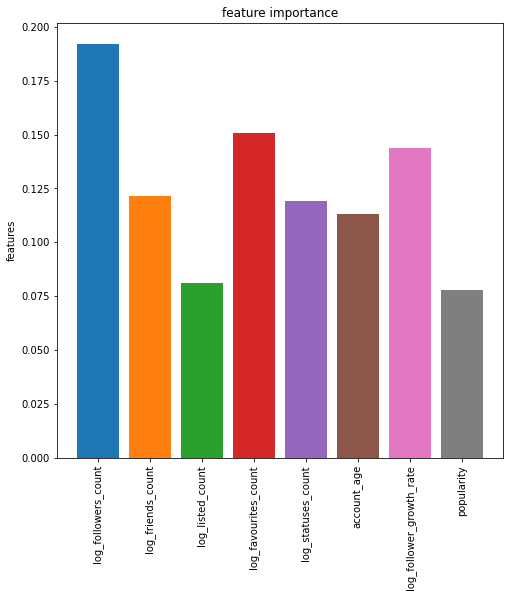

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.bar(x=traning_col, height=ensemble_search.feature_importances_, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
 '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(rotation='vertical')
plt.ylabel('features')
plt.title('feature importance')
plt.show()

##KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_classify = KNeighborsClassifier(n_neighbors=5)
knn_classify.fit(X_train, y_train)
knn_classify_prediction=knn_classify.predict(X_test)
ShowPerformance(knn_classify_prediction, y_test)

Accuracy is 79.2056%
 Precision is 72.8928%
 Recall is 63.7403%
F1 Score is 0.7884



##Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_classify= GaussianNB()
nb_classify.fit(X_train, y_train)
nb_classify_prediction=nb_classify.predict(X_test)
ShowPerformance(nb_classify_prediction, y_test)

Accuracy is 77.1240%
 Precision is 63.8157%
 Recall is 78.6035%
F1 Score is 0.7756

